In [466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
import spin_models as spin
import Merger_rate_plot as merg

In [467]:
plt.style.use(['science'])
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [468]:
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pyplot as plt
import scienceplots
mpl.rcParams['figure.dpi']=150
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)

In [469]:
import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value
from astropy import constants as const

In [470]:
boxsize = 75.0
omega_m = 0.2726
omega_l = 0.7274
h = 0.704
vol_comov_box = (boxsize/h)**3 #Mpc^3


In [471]:
import BH_binary_kicks_data as gw_kick
import BH_triple_kicks_data as trip_kick

In [472]:
Binary_filename = "/Users/pranavsatheesh/Triples/Github/Illustris_Data/iso_binaries_data_from_ill.csv"
triple_filename = "/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Data/Triple_outcomes_N_100.csv"
Nruns= 100

In [473]:
df_binary_w_kick = gw_kick.binary_kick_assign(Binary_filename)
df_iso_binary_w_kick = df_binary_w_kick[df_binary_w_kick["merger_flag"]=="Yes"]

In [474]:
df_iso_binary_w_kick

,M1,M2,qin,t_merger,z_merger,GW-kick-random-dry,GW-kick-aligned-5deg,GW-kick-aligned-cold,merger_flag,SubhaloMass,Subhalohalfradius,sim_scale
0,2.260508e+06,1.628522e+06,0.720423,8.585867e+08,6.460270,1363.909671,115.717558,95.228295,Yes,41.589943,116.961934,0.132783
1,1.614294e+06,1.077030e+06,0.667183,8.924214e+08,6.270490,1374.684188,97.930618,435.242218,Yes,42.442422,95.018506,0.136269
2,6.552913e+06,1.175374e+06,0.179367,3.833599e+09,1.720798,315.261171,147.877667,302.283823,Yes,81.352228,126.729629,0.137510
5,2.594471e+06,1.828861e+06,0.704907,1.008202e+09,5.702360,2005.495724,324.313007,230.480614,Yes,0.498461,7.011886,0.147918
6,6.833995e+06,1.227516e+06,0.179619,3.200552e+09,2.080566,285.439285,98.075943,335.610360,Yes,51.885182,113.040111,0.150403
...,...,...,...,...,...,...,...,...,...,...,...,...
7076,2.919560e+08,1.031719e+08,0.353382,1.354344e+10,0.016169,1332.953571,222.552353,394.931973,Yes,645.193317,218.398744,0.967072
7093,1.666224e+06,1.543917e+06,0.926596,1.340533e+10,0.026261,173.019433,392.199380,509.874799,Yes,43.647127,55.004981,0.972114
7098,6.658123e+08,2.339235e+06,0.003513,1.375498e+10,0.000987,0.833883,0.106479,0.266739,Yes,990.158341,240.617947,0.973068
7101,4.740369e+06,1.196412e+06,0.252388,1.339963e+10,0.026680,183.806834,263.638673,135.906004,Yes,66.613230,67.536246,0.974709


In [188]:
#triple_filename = "/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Data/Triple_outcomes_N_100.csv"
df_trip_kick = pd.read_csv(triple_filename) 
df_trip_kick.head()

,M1,M2,M3,qin,qout,t_merger,z_merger,t_form,a_triple_int,merger_flag,Slingshot_kick,gw_kick_random,gw_kick_cold,gw_kick_5deg,binary_merger_flag
0,2.119978e+07,3.473441e+06,2.463118e+07,0.163843,0.998296,1.384707e+09,4.421980,1.352693e+09,0.006986,Tr-ej,8596.591090,132.586047,513.155879,201.802536,Yes
1,2.391268e+08,1.296146e+08,1.287504e+07,0.542033,0.034916,1.150721e+10,0.181629,5.596503e+09,0.219423,Tr-ej,803.621211,989.199973,450.912503,181.599947,Yes
2,2.122135e+08,1.477407e+08,6.859143e+06,0.696189,0.019056,8.389566e+10,0.000000,1.100114e+10,0.057046,No,1611.662895,0.000000,0.000000,0.000000,No
3,8.239502e+07,5.113722e+07,4.296126e+06,0.620635,0.032173,1.040584e+11,0.000000,1.303832e+10,0.073483,No,851.491213,0.000000,0.000000,0.000000,No
4,4.625245e+07,8.973635e+06,2.419779e+06,0.194014,0.043816,4.013510e+10,0.000000,3.438074e+09,0.172453,No,270.385087,0.000000,0.000000,0.000000,No


In [427]:
Nruns = 100
Ntriple = 520
v_max = 2000
vbin_size = 100

def dNbydVforsling():
    dNbydV_array = []
    for i in range(Nruns):
        df_trip_kick_i = df_trip_kick[i:(i+1)*Ntriple]
        #dVcratio = cosmo.differential_comoving_volume(df_trip_kick_i["z_merger"] ).value * 4*np.pi/vol_comov_box
        Nvslingshot,vbin_edges = np.histogram(df_trip_kick_i["Slingshot_kick"] ,range=(0,v_max),bins=int(v_max/vbin_size))
        vbins = vbin_edges[:-1] + 0.5*vbin_size
        #dNv_sling,tmp = np.histogram(df_trip_kick_i["Slingshot_kick"],weights=1*np.ones(len(df_trip_kick_i["Slingshot_kick"])),range=(0,v_max),bins=int(v_max/vbin_size))
        dNv_sling,tmp = np.histogram(df_trip_kick_i["Slingshot_kick"],range=(0,v_max),bins=int(v_max/vbin_size))
        dNbydV_array.append(dNv_sling/vbin_size)

    dNbydV_array = np.array(dNbydV_array)/vol_comov_box
    return vbins,dNbydV_array



In [428]:
def dNbydVforGW():
    dNbydV_random = []
    dNbydV_cold = []
    dNbydV_deg5= []

    for i in range(Nruns):
        df_trip_kick_i = df_trip_kick[i:(i+1)*Ntriple]
        Nvrandom,vbin_edges = np.histogram(df_trip_kick_i["gw_kick_random"] ,range=(0,v_max),bins=int(v_max/vbin_size))
        Nvrand,vbin_edges = np.histogram(df_iso_binary_w_kick["GW-kick-random-dry"] ,range=(0,v_max),bins=int(v_max/vbin_size))

        # Nvcold,vbin_edges = np.histogram(df_trip_kick_i["gw_kick_cold"] ,range=(0,v_max),bins=int(v_max/vbin_size))
        # Nvdeg5,vbin_edges = np.histogram(df_trip_kick_i["gw_kick_5deg"] ,range=(0,v_max),bins=int(v_max/vbin_size))
        
        vbins = vbin_edges[:-1] + 0.5*vbin_size
        #dNv_sling,tmp = np.histogram(df_trip_kick_i["Slingshot_kick"],weights=1*np.ones(len(df_trip_kick_i["Slingshot_kick"])),range=(0,v_max),bins=int(v_max/vbin_size))
        dNv_random,tmp = np.histogram(df_trip_kick_i["gw_kick_random"],range=(0,v_max),bins=int(v_max/vbin_size))
        dNv_cold,tmp = np.histogram(df_trip_kick_i["gw_kick_cold"],range=(0,v_max),bins=int(v_max/vbin_size))
        dNv_deg5,tmp = np.histogram(df_trip_kick_i["gw_kick_5deg"],range=(0,v_max),bins=int(v_max/vbin_size))
        dNbydV_random.append((dNv_random/vbin_size)/vol_comov_box)
        dNbydV_cold.append((dNv_cold/vbin_size)/vol_comov_box)
        dNbydV_deg5.append((dNv_deg5/vbin_size)/vol_comov_box)
    
    return vbins,[dNbydV_random,dNbydV_cold,dNbydV_deg5]

In [429]:
def dNbydVforiso(df_iso):
    
        
    #dVcratio = cosmo.differential_comoving_volume(df_iso["z_merger"] ).value * 4*np.pi/vol_comov_box
    
    Nvrand,vbin_edges = np.histogram(df_iso["GW-kick-random-dry"] ,range=(0,v_max),bins=int(v_max/vbin_size))
    vbins = vbin_edges[:-1] + 0.5*vbin_size
        #dNv_sling,tmp = np.histogram(df_trip_kick_i["Slingshot_kick"],weights=1*np.ones(len(df_trip_kick_i["Slingshot_kick"])),range=(0,v_max),bins=int(v_max/vbin_size))
    
    dNvrand,vbin_edges = np.histogram(df_iso["GW-kick-random-dry"],range=(0,v_max),bins=int(v_max/vbin_size))   
    dNv5deg,vbin_edges = np.histogram(df_iso["GW-kick-aligned-5deg"],range=(0,v_max),bins=int(v_max/vbin_size))   
    dNvcold,vbin_edges = np.histogram(df_iso["GW-kick-aligned-cold"],range=(0,v_max),bins=int(v_max/vbin_size))   

    return vbins,[dNvrand/vol_comov_box,dNvcold/vol_comov_box,dNv5deg/vol_comov_box]

In [430]:
vbins,dNbydV_sling = dNbydVforsling(df_trip_kick)
vbins,dNbydV_gw = dNbydVforGW(df_trip_kick)
vbins,dNbydV_iso = dNbydVforiso(df_iso_binary_w_kick)

In [288]:
df_trip_kick_0 = df_trip_kick[:520]

In [187]:
Ntriple = int(len(df_trip_kick["M1"])/Nruns)
print(Ntriple)

520


In [289]:
dVcratio = cosmo.differential_comoving_volume(df_trip_kick_0["z_merger"] ).value * 4*np.pi/vol_comov_box

In [331]:
vbin_size = 100
v_max = 2000
Nvslingshot,vbin_edges = np.histogram(df_trip_kick_0["Slingshot_kick"] ,range=(0,v_max),bins=int(v_max/vbin_size))
vbins = vbin_edges[:-1] + 0.5*vbin_size
dNv_sling,tmp = np.histogram(df_trip_kick_0["Slingshot_kick"],weights=1*np.ones(len(df_trip_kick_0["Slingshot_kick"])),range=(0,v_max),bins=int(v_max/vbin_size))
#dNv_sling,tmp = np.histogram(df_trip_kick_0["Slingshot_kick"],weights=dVcratio,range=(0,v_max),bins=int(v_max/vbin_size))

In [332]:
dNbydV = dNv_sling/vbin_size

In [ ]:
i=4
df_i = df_trip_kick[Ntriple*i:Ntriple*(i+1)]
df_i_merged = df_i[df_i["merger_flag"]!="No"]

gwkick_5deg = len(df_i_merged[df_i_merged["gw_kick_5deg"]>Vth]) + len(df_iso_binary_w_kick[df_iso_binary_w_kick["GW-kick-aligned-5deg"]>Vth])
gwkick_random = len(df_i_merged[df_i_merged["gw_kick_random"]>Vth]) + len(df_iso_binary_w_kick[df_iso_binary_w_kick["GW-kick-random-dry"]>Vth])
gwkick_cold = len(df_i_merged[df_i_merged["gw_kick_cold"]>Vth]) + len(df_iso_binary_w_kick[df_iso_binary_w_kick["GW-kick-aligned-cold"]>Vth])

slingshotkick = len(df_i_merged[df_i_merged["Slingshot_kick"]>Vth])

totalkicks = slingshotkick+gwkick_5deg+gwkick_cold+gwkick_random

Total_merger = len(df_i_merged) + len(df_iso_binary_w_kick["merger_flag"])

In [194]:
Vthresholds = np.arange(100,2600,125)

In [195]:
N_list = []
for i in range(Nruns):
    df_i = df_trip_kick[Ntriple*i:Ntriple*(i+1)]
    N_l = len(df_i[(df_i["merger_flag"]=="Tr-ej")])
    N_list.append(N_l/520)

In [203]:
Mergers_vs_kicks = []

for Vth in Vthresholds:

    Total_mergers = []
    Total_kicks = []
    Total_5degkicks = []
    Total_coldkicks = []
    Total_randkicks = []
    Total_slingshotkicks = []

    for i in range(Nruns):

        df_i = df_trip_kick[Ntriple*i:Ntriple*(i+1)]
        
        df_i_merged = df_i[df_i["merger_flag"]!="No"]
        #df_i_merg_in_insp = df_i[(df_i["binary_merger_flag"]=="Yes")&(df_i["merger_flag"]=="No")]
        Total_mergers.append(len(df_i_merged) + len(df_iso_binary_w_kick["merger_flag"]))
        #Total_mergers.append(len(df_i_merged) + len(df_i_merg_in_insp) + len(df_iso_binary_w_kick["merger_flag"]))

        # gwkick_5deg = len(df_i_merged[df_i_merged["gw_kick_5deg"]>Vth]) + len(df_iso_binary_w_kick[df_iso_binary_w_kick["GW-kick-aligned-5deg"]>Vth])
        # gwkick_random = len(df_i_merged[df_i_merged["gw_kick_random"]>Vth]) + len(df_iso_binary_w_kick[df_iso_binary_w_kick["GW-kick-random-dry"]>Vth])
        # gwkick_cold = len(df_i_merged[df_i_merged["gw_kick_cold"]>Vth]) + len(df_iso_binary_w_kick[df_iso_binary_w_kick["GW-kick-aligned-cold"]>Vth])
        

        any_kick_trip = len(df_i[(df_i["gw_kick_5deg"]>Vth)|(df_i["gw_kick_random"]>Vth)|(df_i["gw_kick_cold"]>Vth)|(df_i_merged["Slingshot_kick"]>Vth)])
        any_kick_binary = len(df_iso_binary_w_kick[(df_iso_binary_w_kick["GW-kick-aligned-5deg"]>Vth)|(df_iso_binary_w_kick["GW-kick-random-dry"]>Vth)|(df_iso_binary_w_kick["GW-kick-aligned-cold"]>Vth)])
        Total_kicks.append(any_kick_trip+any_kick_binary)

        Total_slingshotkicks.append(len(df_i_merged[df_i_merged["Slingshot_kick"]>Vth]))
        #Total_slingshotkicks.append(len(df_i_merged[df_i_merged["Slingshot_kick"]>Vth])+len(df_i_merg_in_insp["Slingshot_kick"]>Vth))
        Total_randkicks.append(len(df_i_merged[(df_i_merged["gw_kick_random"]>Vth)])+ len(df_iso_binary_w_kick[df_iso_binary_w_kick["GW-kick-random-dry"]>Vth]))
        #Total_randkicks.append(len(df_i_merged[(df_i_merged["Slingshot_kick"]>Vth)|(df_i_merged["gw_kick_random"]>Vth)])+ len(df_iso_binary_w_kick[df_iso_binary_w_kick["GW-kick-random-dry"]>Vth]))
        Total_coldkicks.append(len(df_i_merged[(df_i_merged["gw_kick_cold"]>Vth)])+ len(df_iso_binary_w_kick[df_iso_binary_w_kick["GW-kick-aligned-cold"]>Vth]))
        #Total_coldkicks.append(len(df_i_merged[(df_i_merged["Slingshot_kick"]>Vth)|(df_i_merged["gw_kick_cold"]>Vth)])+ len(df_iso_binary_w_kick[df_iso_binary_w_kick["GW-kick-aligned-cold"]>Vth]))
        Total_5degkicks.append(len(df_i_merged[(df_i_merged["gw_kick_5deg"]>Vth)])+ len(df_iso_binary_w_kick[df_iso_binary_w_kick["GW-kick-aligned-5deg"]>Vth]))

    
        #Total_kicks.append(slingshotkick+gwkick_5deg+gwkick_cold+gwkick_random)
        # Total_slingshotkicks.append(slingshotkick)
        # Total_5degkicks.append(slingshotkick+gwkick_5deg)
        # Total_coldkicks.append(slingshotkick+gwkick_cold)
        # Total_randkicks.append(slingshotkick+gwkick_random)


    Total_mergers = np.array(Total_mergers)
    #Total_kicks = np.array(Total_kicks)
    Total_5degkicks = np.array(Total_5degkicks)
    Total_coldkicks = np.array(Total_coldkicks)
    Total_randkicks = np.array(Total_randkicks)
    Total_slingshotkicks = np.array(Total_slingshotkicks)

    Mergers_vs_kicks.append([Total_mergers,Total_kicks,Total_randkicks,Total_coldkicks,Total_5degkicks,Total_slingshotkicks])

Mergers_vs_kicks = np.array(Mergers_vs_kicks)

In [205]:
Total_kick_fraction_all = np.mean(Mergers_vs_kicks[:,1,:]/Mergers_vs_kicks[:,0,:],axis=1)
Total_kick_fraction_rand = np.mean(Mergers_vs_kicks[:,2,:]/Mergers_vs_kicks[:,0,:],axis=1)
Total_kick_fraction_cold = np.mean(Mergers_vs_kicks[:,3,:]/Mergers_vs_kicks[:,0,:],axis=1)
Total_kick_fraction_deg5 = np.mean(Mergers_vs_kicks[:,4,:]/Mergers_vs_kicks[:,0,:],axis=1)
Total_kick_fraction_slingshot = np.mean(Mergers_vs_kicks[:,5,:]/Mergers_vs_kicks[:,0,:],axis=1)

spread_kick_fraction_rand = np.std(Mergers_vs_kicks[:,2,:]/Mergers_vs_kicks[:,0,:],axis=1)
spread_kick_fraction_cold = np.std(Mergers_vs_kicks[:,3,:]/Mergers_vs_kicks[:,0,:],axis=1)
spread_kick_fraction_deg5 = np.std(Mergers_vs_kicks[:,4,:]/Mergers_vs_kicks[:,0,:],axis=1)
spread_kick_fraction_slingshot = np.std(Mergers_vs_kicks[:,5,:]/Mergers_vs_kicks[:,0,:],axis=1)

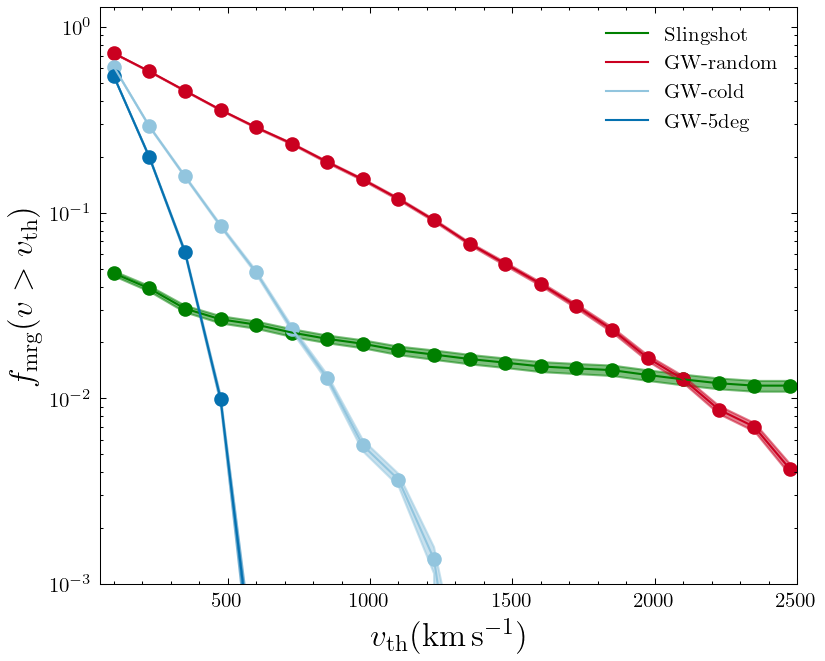

In [229]:
plt.figure(figsize=[6,5])
plt.plot(Vthresholds,Total_kick_fraction_slingshot,color="green",label="Slingshot")
plt.scatter(Vthresholds,Total_kick_fraction_slingshot,color="green")
plt.fill_between(Vthresholds,(Total_kick_fraction_slingshot-spread_kick_fraction_slingshot),(Total_kick_fraction_slingshot+spread_kick_fraction_slingshot),color="green",alpha=0.5)


plt.plot(Vthresholds,Total_kick_fraction_rand,color="#ca0020",label="GW-random")
plt.scatter(Vthresholds,Total_kick_fraction_rand,color="#ca0020")
plt.fill_between(Vthresholds,(Total_kick_fraction_rand-spread_kick_fraction_rand),(Total_kick_fraction_rand+spread_kick_fraction_rand),color="#ca0020",alpha=0.5)

plt.plot(Vthresholds,Total_kick_fraction_cold,color="#92c5de",label="GW-cold")
plt.scatter(Vthresholds,Total_kick_fraction_cold,color="#92c5de")
plt.fill_between(Vthresholds,(Total_kick_fraction_cold-spread_kick_fraction_cold),(Total_kick_fraction_cold+spread_kick_fraction_cold),color="#92c5de",alpha=0.5)

plt.plot(Vthresholds,Total_kick_fraction_deg5,color="#0571b0",label="GW-5deg")
plt.scatter(Vthresholds,Total_kick_fraction_deg5,color="#0571b0")
plt.fill_between(Vthresholds,(Total_kick_fraction_deg5-spread_kick_fraction_deg5),(Total_kick_fraction_deg5+spread_kick_fraction_deg5),color="#0571b0",alpha=0.5)

plt.yscale("log",base=10)

plt.xlabel(r"$v_{\text{th}} (\text{km} \, \text{s}^{-1})$",fontsize=16)
plt.ylabel(r"$f_{\text{mrg}}(v > v_{\text{th}})$",fontsize=16)

#plt.title(r"\% of mergers that gives a kick with $v > v_{\text{threshold}}$")
plt.ylim(10**-3,)
plt.xlim(50,2500)
plt.legend()
plt.yscale("log",base=10)
plt.savefig("Figures/Recoil-vel-for-mergers.pdf")

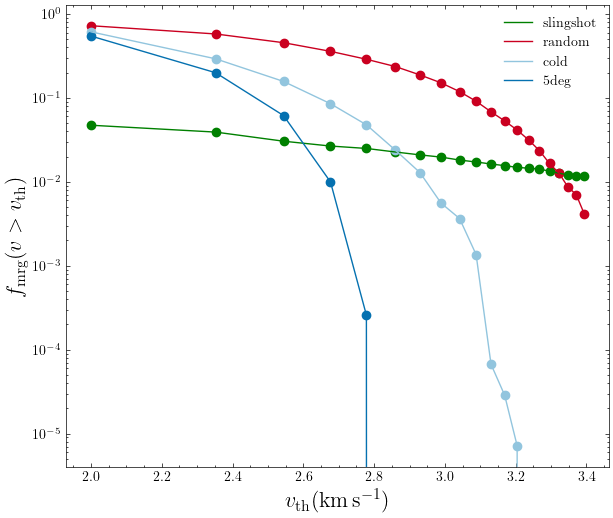

In [211]:
plt.figure(figsize=[7,6])
#plt.plot(np.log10(Vthresholds),Total_kick_fraction_all*100,label="all")
#plt.scatter(ntp.log10(Vthresholds),Total_kick_fraction_all*100)

plt.plot(np.log10(Vthresholds),Total_kick_fraction_slingshot,color="green",label="slingshot")
plt.scatter(np.log10(Vthresholds),Total_kick_fraction_slingshot,color="green")

plt.plot(np.log10(Vthresholds),Total_kick_fraction_rand,color="#ca0020",label="random")
#plt.fill_between(np.log10(Vthresholds),(Total_kick_fraction_rand-spread_kick_fraction_rand)*100,(Total_kick_fraction_rand+spread_kick_fraction_rand)*100)
plt.scatter(np.log10(Vthresholds),Total_kick_fraction_rand,color="#ca0020")
plt.plot(np.log10(Vthresholds),Total_kick_fraction_cold,color="#92c5de",label="cold")
plt.scatter(np.log10(Vthresholds),Total_kick_fraction_cold,color="#92c5de")

plt.plot(np.log10(Vthresholds),Total_kick_fraction_deg5,color="#0571b0",label="5deg")
plt.scatter(np.log10(Vthresholds),Total_kick_fraction_deg5,color="#0571b0")

#plt.ylabel("\% of kicks")
plt.xlabel(r"$v_{\text{th}} (\text{km} \, \text{s}^{-1})$",fontsize=16)
plt.ylabel(r"$f_{\text{mrg}}(v > v_{\text{th}})$",fontsize=16)

#plt.title(r"\% of mergers that gives a kick with $v > v_{\text{threshold}}$")
plt.legend()
plt.yscale("log")
#plt.savefig("Figures/fraction_of_mergers_above_v_threshold")